In [1]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10,6))

In [4]:
%matplotlib inline

In [14]:
shp_path = "./maakond_20221201.shp"
sf = shp.Reader(shp_path, encoding="latin1")

In [15]:
len(sf.shapes()) #sest 15 maakonda

15

In [21]:
def read_shapefile(sf):
    """
    Read a shapefile into a Pandas dataframe with a 'coords' 
    column holding the geometry information. This uses the pyshp package
    """
    fields = [x[0] for x in sf.fields][1:]
    records = sf.records()
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

In [22]:
df = read_shapefile(sf)
df.shape

(15, 3)

In [23]:
df.sample(5)

,MNIMI,MKOOD,coords
6,Ida-Viru maakond,0045,"[(667983.9473537137, 6592379.003345686), (6679..."
3,Harju maakond,0037,"[(555043.2189999968, 6611619.488000002), (5550..."
9,Järva maakond,0052,"[(560449.29, 6519256.0), (560687.83, 6519693.0..."
13,Lääne-Viru maakond,0060,"[(603455.2930680577, 6604360.345851621), (6034..."
5,Rapla maakond,0071,"[(504136.45, 6536681.57), (504465.71, 6536909...."


In [24]:
df.MNIMI

0          Saare maakond
1       Viljandi maakond
2           Hiiu maakond
3          Harju maakond
4          Lääne maakond
5          Rapla maakond
6       Ida-Viru maakond
7          Valga maakond
8          Tartu maakond
9          Järva maakond
10          Võru maakond
11        Jõgeva maakond
12         Pärnu maakond
13    Lääne-Viru maakond
14         Põlva maakond
Name: MNIMI, dtype: object

In [28]:
def plot_shape(id, s=None):
    """ PLOTS A SINGLE SHAPE """
    plt.figure()
    ax = plt.axes()
    ax.set_aspect('equal')
    shape_ex = sf.shape(id)
    x_lon = np.zeros((len(shape_ex.points),1))
    y_lat = np.zeros((len(shape_ex.points),1))
    for ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    plt.plot(x_lon,y_lat) 
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # use bbox (bounding box) to set plot limits
    plt.xlim(shape_ex.bbox[0],shape_ex.bbox[2])
    return x0, y0

In [48]:
df[df.MNIMI == 'Lääne-Viru maakond'].index[0]

13

(550156.6948881003, 6594016.040129869)

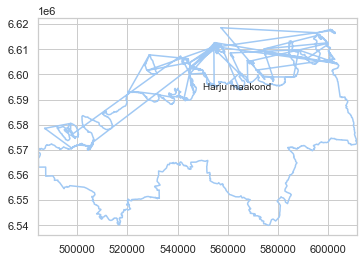

In [50]:
maakond = 'Harju maakond'
mk_id = df[df.MNIMI == maakond].index[0]
plot_shape(mk_id, maakond)

In [73]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    '''
    Plot map with lim coordinates
    '''
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, df.loc[id].MNIMI, fontsize=12)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [2]:
plot_map(sf)

NameError: name 'plot_map' is not defined

NameError: name 'countries' is not defined